# Normalfördelningen
Normalfördelningen är kanske den vanligast förekommande sannolikhetsfördelningen i naturen. Den är också den som används som utgångspunkt för många andra fördelningar. 

Normalfördelningen är en kontinuerlig fördelning och har en s.k. "klockform". Normalfördelningen har ett medelvärde $\mu$ och en standardavvikelse $\sigma$. Normalfördelningen är definierad som
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

### Normalfördelningens egenskaper
Normalfördelningen har ett antal egenskaper som är viktiga att känna till.

* Normalfördelningen är symmetrisk kring medelvärdet $\mu$.
* Standardavvikelsen $\sigma$ anger hur mycket fördelningen är spridd. Ju större $\sigma$ är, desto mer spridd är fördelningen.
* Många andra fördelningar kan approximeras av normalfördelningen.
* Matematiska egenskaper som gör den lätt att arbeta med.




In [196]:
# Create a figure using opencv tarckbar to show normal distribution with different parameters
import numpy as np
import cv2 
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib qt

# Empty function for opencv trackbar
def nothing(x):
    pass

# Create a normal distribution with mean mu and standard deviation sigma
def normal_distribution(mu, sigma, start=-10, end=10, step=0.1):
    x = np.arange(start=start, stop=end, step=step)
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return x, y

# Create a figure using opencv tarckbar to show normal distribution with different parameters
def draw_normal_dist(start, end, step, mu, sigma):
    # Create a black image to inialized the figure
    img = np.zeros((1,512,3), np.uint8)
    # Create a window
    cv2.namedWindow('image')
    # Create trackbars for color change
    cv2.createTrackbar('mu','image',start*10,end*10,nothing)
    cv2.setTrackbarMin('mu','image',start * 10)
    cv2.createTrackbar('sigma','image',1,30,nothing)
    cv2.setTrackbarMin('sigma','image',1)
    
    # Create plot
    try:
        while(1):
            cv2.imshow('image',img)
            k = cv2.waitKey(1) & 0xFF
            if k == 27:
                break

            # get current positions of four trackbars
            mu_10 = cv2.getTrackbarPos('mu','image')
            sigma_10 = cv2.getTrackbarPos('sigma','image')
            mu = mu_10 / 10
            sigma = sigma_10 / 10
            
            # Get the normal distribution
            x, y = normal_distribution(mu, sigma, start, end, step)
            # Plot the normal distribution
            plt.plot(x, y)
            plt.title(f'Normal Distribution with $\mu$={mu} and $\sigma$={sigma}')
            plt.xlim(start, end)
            plt.ylim(0, 1)
            plt.draw()
            plt.pause(0.0001)
            plt.clf()
    except:  
        cv2.destroyAllWindows()
        plt.close()


# Starting parameters for the normal distribution
start = -20
end = 20
step = 0.1
mu = 0
sigma = 1

# Draw the normal distribution        
draw_normal_dist(start=start, end=end, step=step, mu=mu, sigma=sigma)


## Normalfördelningar i verkligheten

Låt oss titta på ett exempel där normalfördelningen tillämpas.

På högskoleprovet vill man att varje provs provresultat ska vara lika svårt att uppnå oavsett vid vilket provtillfälle man utför det. Detta för att undvika att någon grupp studenter har en fördel gentemot andra. Detta uppnås genom att vikta provresultaten så att de följer en normalfördelning. 

#### Komma åt data
För att läsa in data med resultat från högskoleprovet kommer vi använda oss av `BeautifulSoup`. Hemsidan som vi ska hämta data ifrån är [Normeringstabell 2015](https://www.studera.nu/hogskoleprov/fpn/normeringstabeller-varen-2015/).

In [17]:
# Webb scrape data från normeringstabellen av högskoleprovet
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Hämta hemsidans innehåll
url = 'https://www.studera.nu/hogskoleprov/fpn/normeringstabeller-varen-2015/'
webpage = requests.get(url)
soup = BeautifulSoup(webpage.text, 'html.parser')

# Hitta tabellen
table = soup.find('tbody')  # Hitta första tabellen (Kvantitativa delen)

print(table.prettify())

<tbody>
 <tr>
  <td>
   Antal rätta svar
  </td>
  <td>
   Normerad poäng
  </td>
  <td>
   Antal provdeltagare
  </td>
  <td>
   Andel provdeltagare (%)
  </td>
  <td>
   <p>
    Kumulativ andel provdeltagare (%)
   </p>
  </td>
 </tr>
 <tr>
  <td>
   0-21
  </td>
  <td>
   0.0
  </td>
  <td>
   1802
  </td>
  <td>
   2.4
  </td>
  <td>
   2.4
  </td>
 </tr>
 <tr>
  <td>
   22-24
  </td>
  <td>
   0.1
  </td>
  <td>
   2410
  </td>
  <td>
   3.2
  </td>
  <td>
   5.6
  </td>
 </tr>
 <tr>
  <td>
   25-26
  </td>
  <td>
   0.2
  </td>
  <td>
   2273
  </td>
  <td>
   3.0
  </td>
  <td>
   8.6
  </td>
 </tr>
 <tr>
  <td>
   27-28
  </td>
  <td>
   0.3
  </td>
  <td>
   2823
  </td>
  <td>
   3.7
  </td>
  <td>
   12.3
  </td>
 </tr>
 <tr>
  <td>
   29-30
  </td>
  <td>
   0.4
  </td>
  <td>
   3463
  </td>
  <td>
   4.6
  </td>
  <td>
   16.9
  </td>
 </tr>
 <tr>
  <td>
   31-32
  </td>
  <td>
   0.5
  </td>
  <td>
   3822
  </td>
  <td>
   5.1
  </td>
  <td>
   22.0
  </td>
 </tr>
 <tr>

När vi hittat den del av hemsidan vi är intresserade av kan vi forsätta att använda `Beautifulsoup` för att extrahera datan från tabellen.

In [ ]:

# Hitta alla rader
rows = table.find_all('tr')

# Skapa en lista med alla rader
data = []
for row in rows:
    data.append(row.text.split('\n'))


De rader med data som vi nu hittat kan vi plocka in i en `pandas` `DataFrame`.

In [18]:

# Skapa en dataframe
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8
0,,Antal rätta svar,Normerad poäng,Antal provdeltagare,Andel provdeltagare (%),,Kumulativ andel provdeltagare (%),,
1,,0-21,0.0,1802,2.4,2.4,,None,None
2,,22-24,0.1,2410,3.2,5.6,,None,None
3,,25-26,0.2,2273,3.0,8.6,,None,None
4,,27-28,0.3,2823,3.7,12.3,,None,None
5,,29-30,0.4,3463,4.6,16.9,,None,None
6,,31-32,0.5,3822,5.1,22.0,,None,None
7,,33-34,0.6,4196,5.6,27.5,,None,None
8,,35-37,0.7,6530,8.7,36.2,,None,None
9,,38-40,0.8,6926,9.2,45.4,,None,None


Vi ser här att vi fått med kolumner som saknar värden. Dessa kan vi ta bort genom att använda `dropna()`.

In [94]:
# Ta bort tomma kolumner
df_normering = df.dropna(axis=1)
df_normering = df_normering.drop(columns=0)

# Byt namn på kolumnerna till första raden och ta bort den
df_normering.columns = df_normering.iloc[0,:]
df_normering = df_normering.drop(index=0)

df_normering

,Antal rätta svar,Normerad poäng,Antal provdeltagare,Andel provdeltagare (%),,Kumulativ andel provdeltagare (%)
1,0-21,0.0,1802,2.4,2.4,
2,22-24,0.1,2410,3.2,5.6,
3,25-26,0.2,2273,3.0,8.6,
4,27-28,0.3,2823,3.7,12.3,
5,29-30,0.4,3463,4.6,16.9,
6,31-32,0.5,3822,5.1,22.0,
7,33-34,0.6,4196,5.6,27.5,
8,35-37,0.7,6530,8.7,36.2,
9,38-40,0.8,6926,9.2,45.4,
10,41-43,0.9,6584,8.7,54.1,


Vi är nu redo att börja analysera datan.

Stämmer det att högskoleprovet följer en normalfördelning?

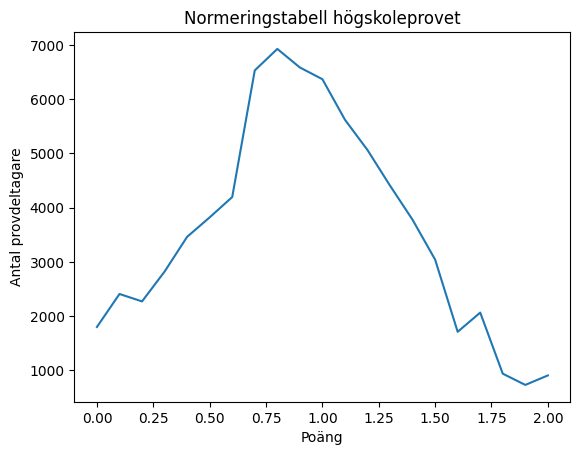

In [108]:
# Plotta normeringstabellen med seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Convert the dataframe to numeric, skipping the first column
df_normering.iloc[:,1:] = df_normering.iloc[:,1:].apply(pd.to_numeric)


# # Plot the data
plt.figure()
plt.plot(df_normering['Normerad poäng'], df_normering['Antal provdeltagare'])
plt.xlabel('Poäng')
plt.ylabel('Antal provdeltagare')
plt.title('Normeringstabell högskoleprovet')
plt.show()




Från hemsidan vet vi att högskoleprovet följer en normalfördelning med medelvärde $\mu = 0.91$ och standardavvikelse $\sigma = 0.45$. 

Låt oss se hur väl detta passar med vår data:

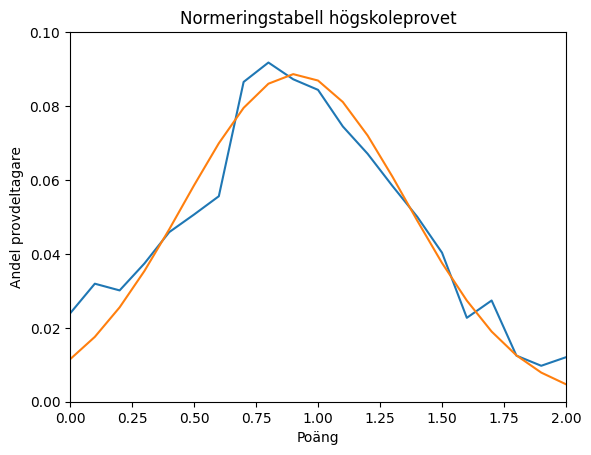

In [139]:
# Beräkna antalet provdeltagare
number_of_perticipants = df_normering['Antal provdeltagare'].sum()

# Plotta fördelning av poäng hos deltagarna
plt.figure()
plt.plot(df_normering['Normerad poäng'], df_normering['Antal provdeltagare'] / number_of_perticipants)

# Plotta normalfördelning med värden från normeringstabellen
mu = 0.91
sigma = 0.45

step = 0.1
x, y = normal_distribution(mu, sigma, start=0, end=2.1, step=step)
y = y * step
plt.plot(x, y)

plt.xlim([0,2])
plt.ylim([0, 0.1])
plt.xlabel('Poäng')
plt.ylabel('Andel provdeltagare')
plt.title('Normeringstabell högskoleprovet')
plt.show()

# Centrala gränsvärdesatsen
Centrala gränsvärdesatsen säger att om vi har en slumpmässig variabel $X$ med en viss fördelning och vi tar många oberoende värden av $X$ och summerar dem, så kommer summan att följa en normalfördelning.


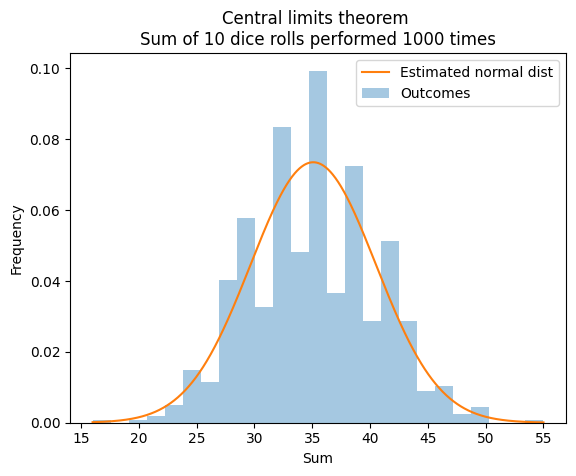

In [221]:
import math 
import random
import seaborn as sns
%matplotlib inline

# Skapa en funktion som returnerar en normalfördelad variabel
def normpdf(x, mean, std):
    out = np.zeros(len(x))
    
    denom = 1 / (2*math.pi*std**2)**0.5
    exp = math.e**(-(x - mean)**2 / (2*std**2))
    
    out = denom * exp
    
    return out

# Parameter till slumpgeneratorn
n_dice = 10         # Antal tärningar
n_times = 1000      # Antal tärningskast

# Summera tärningskast
current_sum = 0
outcomes = np.zeros(n_times)
for i in range(n_times):
    for j in range(n_dice):
        current_sum += random.randint(1, 6)
        
    outcomes[i] = current_sum
    current_sum = 0

# Histogram av summorna
sns.distplot(outcomes, kde=False, norm_hist=True)    

# Normalfördelning
x = np.linspace(outcomes.min(), outcomes.max(), 1000)
y = normpdf(x, outcomes.mean(), outcomes.std())
plt.plot(x, y)

# Title
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.title(f"Central limits theorem \nSum of {n_dice} dice rolls performed {n_times} times")
plt.legend(["Estimated normal dist", "Outcomes"])